#Smartphone Dataset for Anomaly Detection in Crowds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Anomaly detection/Crowd data for anomaly detection.csv')
df.head(2)

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0


##DataSet Overview

The dataset contains the following columns:

timestamp: The time at which the data point was recorded.

X, Y: Coordinates of the agent.

Speed: Speed of the agent.

Heading: Direction in which the agent is heading.

AgentCount: Number of agents in the vicinity.

Density: Density of the crowd around the agent.

Acc: Acceleration of the agent.

LevelOfCrowdness: Level of crowdness in the vicinity.(1 to 5)

label: Binary label indicating normal (0) or anomalous (1) behavior.

label2: Categorical label indicating type of behavior (normal, etc.).

Severity_level: Severity of the anomaly.

```
If label is zero then Severity_level is also zero & Severity_level>0 implies anomaly.
Anamaly behaviour start from 0:31:05 & we have data given till 0:59:59
timestamp column contains duplicates values
LevelOfCrowdness and Density are highly correlated but speed and Acc are not at all related
```

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


In [4]:
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


##Changing datatypes

In [5]:
#changing datatype
df['timestamp']=pd.to_datetime(df['timestamp']).dt.time

<ipython-input-5-0a69a37a8dd5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp']=pd.to_datetime(df['timestamp']).dt.time


In [6]:
df['LevelOfCrowdness'].value_counts()

LevelOfCrowdness
1    11413
3     6638
5     3346
4     1434
2     1292
Name: count, dtype: int64

In [7]:
df['LevelOfCrowdness']=df['LevelOfCrowdness'].astype('category')

In [8]:
df['label'].value_counts()

label
0    17152
1     6971
Name: count, dtype: int64

In [9]:
df['label']=df['label'].astype('category')

In [10]:
df['label2'].value_counts()

label2
normal     17152
anomaly     6971
Name: count, dtype: int64

In [11]:
(df['label2'].apply(lambda x : 0 if x=='normal' else 1)== df['label']).sum()

24123

In [12]:
df['Severity_level'].value_counts()

Severity_level
0    17152
2     4246
1     2191
3      534
Name: count, dtype: int64

In [13]:
df['Severity_level']=df['Severity_level'].astype('category')

Droping label2 since it label encoding has already been done

In [14]:
df.drop(columns=['label2'],inplace=True)

In [15]:
df.head(2)

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
0,00:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,0
1,00:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,0


##Checking for Null values

In [16]:
df.isnull().sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
Severity_level        0
dtype: int64

In [17]:
df['Acc'].describe()

count    24019.000000
mean         0.004203
std          0.032528
min         -1.031300
25%         -0.001400
50%          0.006300
75%          0.013900
max          0.455500
Name: Acc, dtype: float64

##Filling Null values

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
pd.Series((imputer.fit_transform(df['Acc'].values.reshape(-1, 1))).flatten()).describe()

count    24123.000000
mean         0.004203
std          0.032458
min         -1.031300
25%         -0.001400
50%          0.006200
75%          0.013900
max          0.455500
dtype: float64

In [19]:
df['Acc']=imputer.fit_transform(df['Acc'].values.reshape(-1, 1))

## Checking for duplicated values

In [20]:
df.duplicated().sum()

0

##Segrating data for visulisation

In [21]:
#Normal
Normal=df[df['label']==0]
Anomaly=df[df['label']==1]

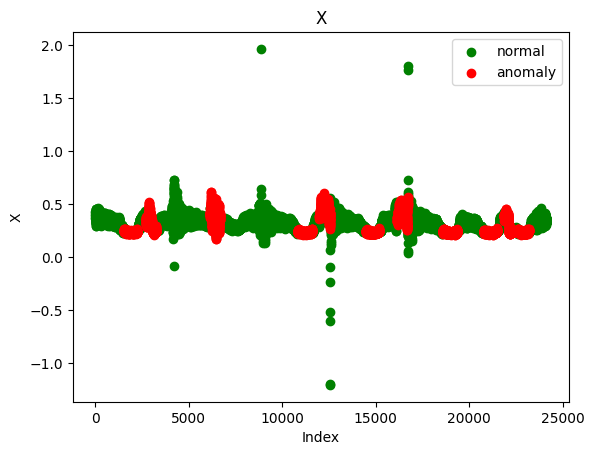

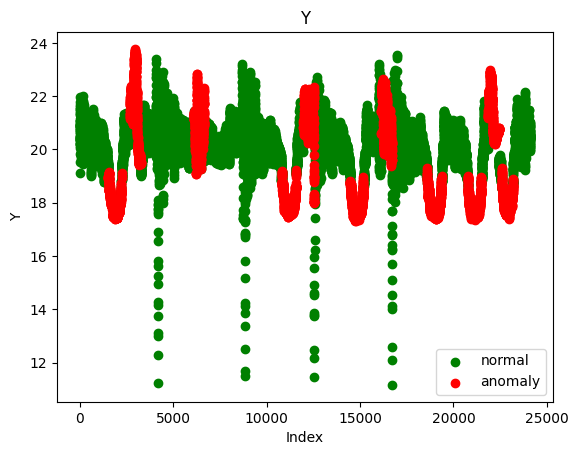

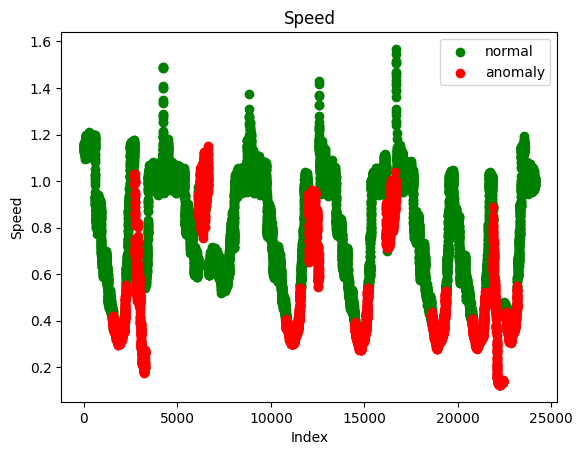

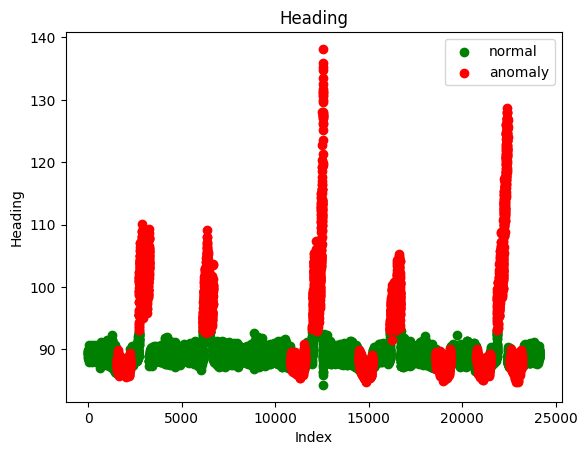

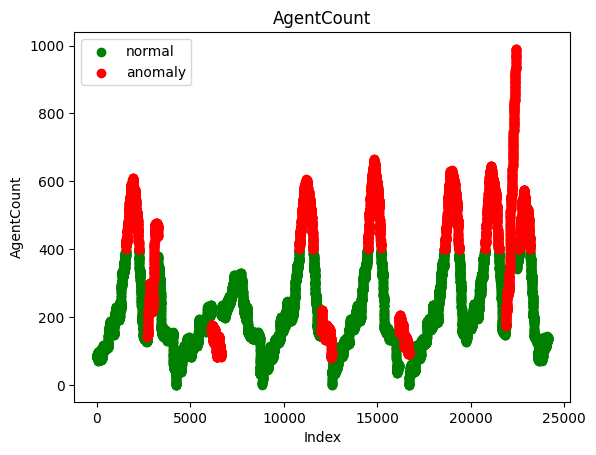

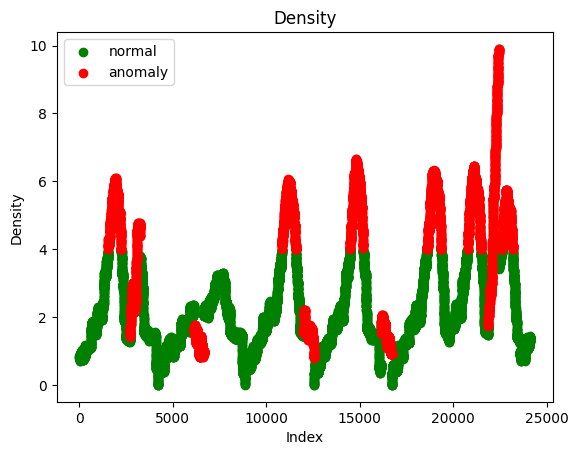

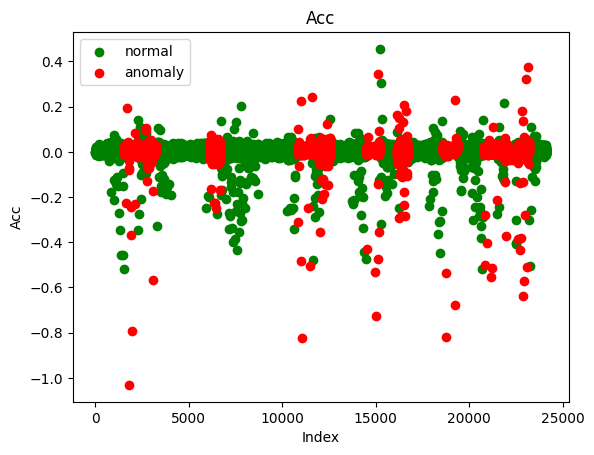

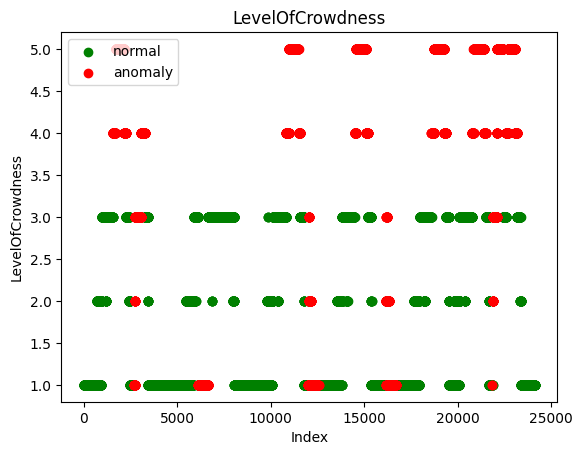

In [22]:
list_to_analyse=['X','Y','Speed','Heading','AgentCount','Density','Acc','LevelOfCrowdness']
for col in list_to_analyse:
  fig,ax=plt.subplots()
  ax.scatter(Normal.index,Normal[col],color='green',label='normal')
  ax.scatter(Anomaly.index,Anomaly[col],color='red',label='anomaly')
  ax.set_xlabel('Index')
  ax.set_ylabel(col)
  ax.legend()
  plt.title(col)
  plt.show()

## Visualization analysis

Since both density and AgentCount has similar plot.

On Analysing, we can say that density*100=AgentCount

In [23]:
df['AgentCount']=df['AgentCount'].astype('float64')

In [24]:
df[df['Density']*100==df['AgentCount']].shape[0]

21736

In [25]:
new_df=df[~(df['Density']*100==df['AgentCount'])][['Density','AgentCount']]

In [26]:
tolerance = 1e-6
(abs((new_df['Density'] * 100) - new_df['AgentCount']) < tolerance).all()

True

Droping AgentCount column

In [27]:
df.drop(columns=['AgentCount'],inplace=True)

## A little Analysis

```
If label is zero then Severity_level is also zero & Severity_level>0 implies anomaly
```

In [28]:
len(df[df['label']==0]),len(df[(df['label'])==0 & (df['Severity_level'].astype(int)==0)])

(17152, 17152)

In [29]:
df[df['Severity_level'].astype(int)!=0]['label'].value_counts()

label
1    6971
0       0
Name: count, dtype: int64

In [30]:
df[df['label']==0]['timestamp'].sort_values().iloc[0],df[df['label']==1]['timestamp'].sort_values().iloc[0]

(datetime.time(0, 0, 13), datetime.time(0, 31, 5))

In [31]:
df[df['label']==0]['timestamp'].sort_values().iloc[-1],df[df['label']==1]['timestamp'].sort_values().iloc[-1]

(datetime.time(0, 59, 59), datetime.time(0, 59, 59))

```
If label is zero then Severity_level is also zero & Severity_level>0 implies anomaly.
Anamaly behaviour start from 0:31:05 & we have data given till 0:59:59
timestamp column contains duplicates values
LevelOfCrowdness and Density are highly correlated but speed and Acc are not at all related
```

In [32]:
df['timestamp'].duplicated().sum()

20536

In [33]:
len(set(df['timestamp'])),len(df['timestamp'])

(3587, 24123)

In [34]:
df.columns

Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'Density', 'Acc',
       'LevelOfCrowdness', 'label', 'Severity_level'],
      dtype='object')

In [35]:
df[['LevelOfCrowdness','Density']].corr()

,LevelOfCrowdness,Density
LevelOfCrowdness,1.000000,0.935304
Density,0.935304,1.000000


In [36]:
df[['Speed','Acc']].corr()

,Speed,Acc
Speed,1.000000,0.008276
Acc,0.008276,1.000000


## DecisionTreeClassifier

In [37]:
train,test=train_test_split(df.drop(columns=['timestamp']),test_size=0.2,random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=2122, splitter='best')
model.fit(train.drop(columns=['Severity_level','label']),train.drop(columns=['label'])['Severity_level'])

DecisionTreeClassifier(random_state=2122)

In [39]:
predicted=model.predict(test.drop(columns=['Severity_level','label']))
y_true=test['label']

In [40]:
test['Severity_level_predicted']=predicted

In [41]:
test['label_predicted']=test.apply(lambda x: 1 if x['Severity_level_predicted']>0 else 0,axis=1)

In [42]:
from sklearn.metrics import accuracy_score,RocCurveDisplay
accuracy_score(test['label_predicted'], y_true)

0.9995854922279793

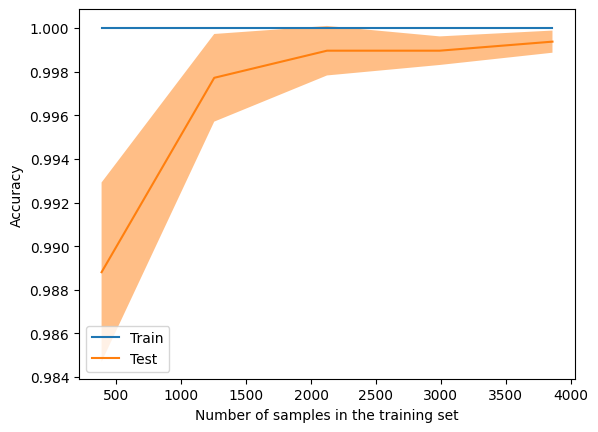

In [43]:
from sklearn.model_selection import LearningCurveDisplay
LearningCurveDisplay.from_estimator(model, test.drop(columns=['Severity_level','label']), test['Severity_level'], cv=5, scoring='accuracy')

In [44]:
test.sample(5)

,X,Y,Speed,Heading,Density,Acc,LevelOfCrowdness,label,Severity_level,Severity_level_predicted,label_predicted
1574,0.2394,18.5516,0.3951,87.4133,4.11,0.0146,4,1,2,2,1
4068,0.3418,20.7343,0.9778,89.6523,1.46,0.0015,1,0,0,0,0
8813,0.2388,20.9022,1.0967,88.7560,0.50,0.0212,1,0,0,0,0
1261,0.3434,20.3834,0.6014,91.4399,2.40,0.0386,3,0,0,0,0
23350,0.3140,20.6392,0.8976,89.7448,2.02,0.0093,3,0,0,0,0


## End of the code